<a href="https://colab.research.google.com/github/Dream-Falls/Lathe_Machine/blob/main/Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics  # install
from ultralytics import YOLO, checks, hub
checks()

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/78.2 GB disk)


In [2]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="qNpHiFnGId9uwKodjkFW")
project = rf.workspace("dreamfalls").project("ml-project-mwqxv")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to ml-project-4 in yolov8:: 100%|██████████| 1218/1218 [00:00<00:00, 3719.13it/s]


In [4]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 368MB/s]


In [6]:
model.train(data="/content/ml-project-4/data.yaml", epochs=25, imgsz=640)

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/ml-project-4/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 43.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 163MB/s]


AMP: checks passed ✅


train: Scanning /content/ml-project-4/train/labels... 528 images, 6 backgrounds, 0 corrupt: 100%|██████████| 528/528 [00:00<00:00, 1775.81it/s]


train: New cache created: /content/ml-project-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/ml-project-4/valid/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 1298.13it/s]

val: New cache created: /content/ml-project-4/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      13.6G      1.217      2.249      1.386         74        640: 100%|██████████| 33/33 [00:41<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

                   all         25         86     0.0852      0.312     0.0967      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      13.2G      1.162      1.428      1.347         87        640: 100%|██████████| 33/33 [00:41<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         25         86    0.00145     0.0132   0.000427   0.000206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      13.2G      1.193      1.485      1.391         92        640: 100%|██████████| 33/33 [00:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         25         86     0.0148      0.173     0.0109    0.00467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      13.4G      1.178      1.311      1.367         80        640: 100%|██████████| 33/33 [00:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         25         86      0.071      0.121       0.03     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      13.2G      1.072      1.118      1.294         82        640: 100%|██████████| 33/33 [00:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         25         86      0.391      0.544      0.393      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      13.4G      1.079      1.038      1.293        149        640: 100%|██████████| 33/33 [00:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         25         86      0.654      0.574      0.592      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      13.4G      1.034     0.9567      1.284        106        640: 100%|██████████| 33/33 [00:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         25         86      0.644      0.586      0.602      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      13.4G      1.009     0.8792       1.26         85        640: 100%|██████████| 33/33 [00:41<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         25         86      0.705      0.684      0.711      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      13.2G     0.9353     0.8336      1.214        116        640: 100%|██████████| 33/33 [00:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         25         86      0.748      0.628      0.692      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      13.5G     0.9022      0.761      1.171         89        640: 100%|██████████| 33/33 [00:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         25         86      0.899      0.654      0.762      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      13.4G     0.8828     0.7381      1.184        110        640: 100%|██████████| 33/33 [00:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         25         86      0.837      0.772      0.817      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      13.4G     0.8578     0.7054      1.146         71        640: 100%|██████████| 33/33 [00:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         25         86      0.878      0.741      0.838      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      13.2G     0.8075      0.672       1.12         84        640: 100%|██████████| 33/33 [00:41<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         25         86       0.85      0.664      0.791      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      13.4G     0.8228     0.6662      1.143         86        640: 100%|██████████| 33/33 [00:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         25         86      0.904      0.717      0.839      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      13.4G     0.7544     0.5824       1.08        107        640: 100%|██████████| 33/33 [00:41<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         25         86       0.92      0.782      0.871      0.579


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      13.4G     0.7143     0.5053      1.099         59        640: 100%|██████████| 33/33 [00:43<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         25         86      0.864      0.761      0.839      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      13.2G      0.675     0.4713      1.055         49        640: 100%|██████████| 33/33 [00:41<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         25         86      0.883      0.739      0.838      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      13.4G     0.6561     0.4462      1.056         52        640: 100%|██████████| 33/33 [00:42<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         25         86      0.878      0.801      0.845      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      13.4G     0.6253     0.4249      1.035         65        640: 100%|██████████| 33/33 [00:41<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         25         86      0.833      0.842      0.869      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      13.4G     0.5803     0.3933     0.9917         59        640: 100%|██████████| 33/33 [00:42<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         25         86      0.834      0.786      0.822      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      13.1G     0.5657     0.3762      1.003         54        640: 100%|██████████| 33/33 [00:42<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         25         86      0.917      0.781      0.874      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      13.4G     0.5567     0.3589     0.9848         52        640: 100%|██████████| 33/33 [00:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         25         86      0.898      0.779      0.879      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      13.4G      0.513      0.338     0.9633         52        640: 100%|██████████| 33/33 [00:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         25         86      0.862      0.813      0.889      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      13.4G     0.4792     0.3181     0.9385         49        640: 100%|██████████| 33/33 [00:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         25         86      0.934      0.783      0.898      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      13.1G     0.4709     0.3149     0.9348         51        640: 100%|██████████| 33/33 [00:41<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         25         86      0.915      0.796      0.891      0.604



25 epochs completed in 0.354 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


                   all         25         86      0.935      0.783      0.898      0.621
                  obj1         14         19      0.995      0.737      0.814      0.584
                  obj2         19         26          1      0.853      0.989      0.676
                  obj3         13         19      0.899      0.789      0.908      0.613
                  obj4         15         22      0.846      0.751      0.881      0.612
Speed: 0.2ms preprocess, 28.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb5d2f790c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [7]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/ml-project-4/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


                   all         25         86      0.934      0.783      0.898       0.62
                  obj1         14         19      0.995      0.737      0.814      0.577
                  obj2         19         26          1      0.853      0.989      0.676
                  obj3         13         19      0.895      0.789      0.908      0.611
                  obj4         15         22      0.846      0.752      0.881      0.616
Speed: 0.4ms preprocess, 72.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train22


array([    0.57695,     0.67649,     0.61117,     0.61646])

In [14]:
print(metrics.box.maps)

[    0.57695     0.67649     0.61117     0.61646]


In [9]:
results = model("/content/lathe 2.jpg")


image 1/1 /content/lathe 2.jpg: 480x640 1 obj1, 1 obj2, 1 obj3, 1 obj4, 78.6ms
Speed: 3.5ms preprocess, 78.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


In [11]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

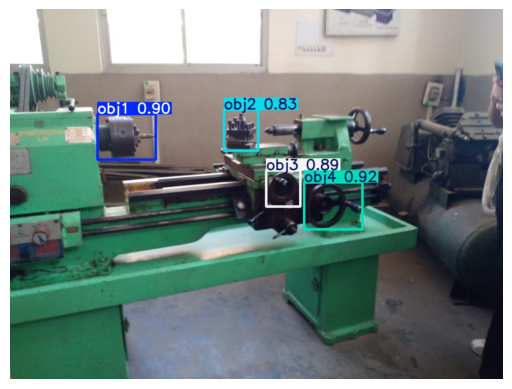

In [12]:
# Step 3: Extract detected object names
detected_objects = set()
if isinstance(results, list):
    for result in results:
        names = result.names
        for class_id in result.boxes.cls:
            detected_objects.add(names[int(class_id)])
else:
    names = results.names
    for class_id in results.boxes.cls:
        detected_objects.add(names[int(class_id)])

# Step 5: Save the result image
save_dir = Path("runs/detect/predict")  # or any other desired directory
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / "result.jpg"
results[0].save(save_path)

# Step 6: Load the image using OpenCV
img = cv2.imread(str(save_path))

# Step 7: Annotate the image with missing object names

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 9: Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.show()